In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
dataset = pd.read_csv('50_Startups.csv')

In [143]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [144]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [145]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

In [146]:
onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()

In [147]:
X[:,0:3]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

In [148]:
# Avoiding the dummy variable Trap
X = X[:,1:]

In [149]:
#Splitting the data into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [150]:
# Fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)

In [152]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [153]:
y_pred

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

Populating the interactive namespace from numpy and matplotlib


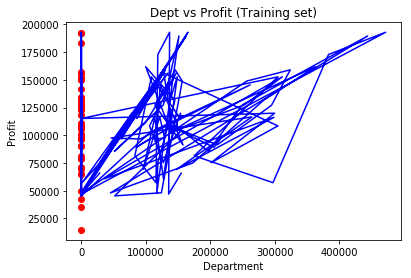

In [171]:
# Visualising the Training set results
%pylab inline
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Dept vs Profit (Training set)')
plt.xlabel('Department')
plt.ylabel('Profit')
plt.show()

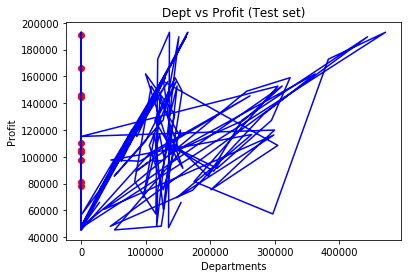

In [174]:
## Visualising the Test set results
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Dept vs Profit (Test set)')
plt.xlabel('Departments')
plt.ylabel('Profit')
plt.show()

In [131]:
# Building an optimal model using Backward elimination
import statsmodels.formula.api as sm
#X = np.append(arr= X,values= np.ones((50,1)).astype(int), axis = 1)
X = np.append(arr=np.ones((50,1)).astype(int), values = X, axis = 1)

In [132]:
X.astype(int)

array([[     1,      0,      1, 165349, 136897, 471784],
       [     1,      0,      0, 162597, 151377, 443898],
       [     1,      1,      0, 153441, 101145, 407934],
       [     1,      0,      1, 144372, 118671, 383199],
       [     1,      1,      0, 142107,  91391, 366168],
       [     1,      0,      1, 131876,  99814, 362861],
       [     1,      0,      0, 134615, 147198, 127716],
       [     1,      1,      0, 130298, 145530, 323876],
       [     1,      0,      1, 120542, 148718, 311613],
       [     1,      0,      0, 123334, 108679, 304981],
       [     1,      1,      0, 101913, 110594, 229160],
       [     1,      0,      0, 100671,  91790, 249744],
       [     1,      1,      0,  93863, 127320, 249839],
       [     1,      0,      0,  91992, 135495, 252664],
       [     1,      1,      0, 119943, 156547, 256512],
       [     1,      0,      1, 114523, 122616, 261776],
       [     1,      0,      0,  78013, 121597, 264346],
       [     1,      0,      1,

In [133]:
X_opt = X[:,[0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog=y,exog = X_opt).fit()# OLS - Ordinary Least Square Mpodel
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           1.34e-27
Time:                        15:07:54   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
#X2 has highest P-value and hence X2 is not statistically significant, and hence X2 has to be removed
X_opt = X[:,[0,1,3,4,5]]
regressor_OLS = sm.OLS(endog=y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           8.49e-29
Time:                        15:07:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
X_opt.astype(int)

array([[     1,      0, 165349, 136897, 471784],
       [     1,      0, 162597, 151377, 443898],
       [     1,      1, 153441, 101145, 407934],
       [     1,      0, 144372, 118671, 383199],
       [     1,      1, 142107,  91391, 366168],
       [     1,      0, 131876,  99814, 362861],
       [     1,      0, 134615, 147198, 127716],
       [     1,      1, 130298, 145530, 323876],
       [     1,      0, 120542, 148718, 311613],
       [     1,      0, 123334, 108679, 304981],
       [     1,      1, 101913, 110594, 229160],
       [     1,      0, 100671,  91790, 249744],
       [     1,      1,  93863, 127320, 249839],
       [     1,      0,  91992, 135495, 252664],
       [     1,      1, 119943, 156547, 256512],
       [     1,      0, 114523, 122616, 261776],
       [     1,      0,  78013, 121597, 264346],
       [     1,      0,  94657, 145077, 282574],
       [     1,      1,  91749, 114175, 294919],
       [     1,      0,  86419, 153514,      0],
       [     1,     

In [136]:
#X1 has highest P-value next to X2 is not statistically significant, and hence X1 has to be removed
X_opt = X[:,[0,3,4,5]]
regressor_OLS = sm.OLS(endog=y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           4.53e-30
Time:                        15:08:01   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
X.astype(int)

array([[     1,      0,      1, 165349, 136897, 471784],
       [     1,      0,      0, 162597, 151377, 443898],
       [     1,      1,      0, 153441, 101145, 407934],
       [     1,      0,      1, 144372, 118671, 383199],
       [     1,      1,      0, 142107,  91391, 366168],
       [     1,      0,      1, 131876,  99814, 362861],
       [     1,      0,      0, 134615, 147198, 127716],
       [     1,      1,      0, 130298, 145530, 323876],
       [     1,      0,      1, 120542, 148718, 311613],
       [     1,      0,      0, 123334, 108679, 304981],
       [     1,      1,      0, 101913, 110594, 229160],
       [     1,      0,      0, 100671,  91790, 249744],
       [     1,      1,      0,  93863, 127320, 249839],
       [     1,      0,      0,  91992, 135495, 252664],
       [     1,      1,      0, 119943, 156547, 256512],
       [     1,      0,      1, 114523, 122616, 261776],
       [     1,      0,      0,  78013, 121597, 264346],
       [     1,      0,      1,

In [138]:
#X1 has highest P-value next to X2 is not statistically significant, and hence X1 has to be removed
X_opt = X[:,[0,3,5]]
regressor_OLS = sm.OLS(endog=y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           2.16e-31
Time:                        15:08:11   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
#X1 has highest P-value next to X2 is not statistically significant, and hence X1 has to be removed
X_opt = X[:,[0,3]]
regressor_OLS = sm.OLS(endog=y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           3.50e-32
Time:                        15:10:31   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
X_opt[:,1].astype(int)

array([165349, 162597, 153441, 144372, 142107, 131876, 134615, 130298,
       120542, 123334, 101913, 100671,  93863,  91992, 119943, 114523,
        78013,  94657,  91749,  86419,  76253,  78389,  73994,  67532,
        77044,  64664,  75328,  72107,  66051,  65605,  61994,  61136,
        63408,  55493,  46426,  46014,  28663,  44069,  20229,  38558,
        28754,  27892,  23640,  15505,  22177,   1000,   1315,      0,
          542,      0])